In [15]:
import numpy as np
%matplotlib inline

import asaplib

In [16]:
import os
# model_dir = "logs-gaussian/CNNhiddendim64"
model_dir = "logs-dir/testloss3_CNN64/"
# work_dir = os.path.join(model_dir, f"val_time0_scale_T0overTk/epoch{10098}")
work_dir = os.path.join(model_dir, f"val_baseline/epoch{10098}")

In [17]:
from asaplib.data import ASAPXYZ


asapxyz = ASAPXYZ(os.path.join(work_dir, 'val-Cu.xyz'), periodic=True) # periodic=False otherwise

load xyz file:  logs-dir/testloss3_CNN64/val_baseline/epoch10098/val-Cu.xyz , a total of  401 frames , a total of  47117 atoms , with elements:  [29] .


In [18]:
# specify the parameters
soap_spec = {'soap1': {'type': 'SOAP',
                       'cutoff': 6,
                       'n': 4,
                       'l': 3,
                       'atom_gaussian_width': 0.36,
                       'crossover': False,
                       'rbf': 'gto'
                      }
            }

reducer_spec = {'reducer1': {
                          'reducer_type': 'average', # [average], [sum], [moment_average], [moment_sum]
                          'element_wise': False}
               }

desc_spec = {'avgsoap': {
                  'atomic_descriptor': soap_spec,
                  'reducer_function': reducer_spec}
            }

In [19]:
# compute atomic descriptors only
asapxyz.compute_atomic_descriptors(desc_spec_dict=soap_spec,
                                    sbs=[],
                                    tag='traj-atomic',
                                    n_process=1)
# compute descriptors for the whole structures
asapxyz.compute_global_descriptors(desc_spec_dict=desc_spec,
                                    sbs=[],
                                    keep_atomic=True, # set to True to keep the atomic descriptors
                                    tag='traj',
                                    n_process=4)


Using SOAP Descriptors ...


100%|██████████| 401/401 [00:01<00:00, 355.01it/s]
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Using SOAP Descriptors ...
Using Atomic_2_Global_Average reducer ...


[Parallel(n_jobs=4)]: Done 281 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 401 out of 401 | elapsed:    0.4s finished


In [20]:

font={'family':'serif',
      # 'style':'italic',  # 斜体
      'weight':'normal',
      # 'color':'red',
      'size': 18
}  
def setfigform_simple(xlabel, ylabel=None, xlimit = (None,None), ylimit = (None, None)):
    # plt.legend(fontsize = 16, frameon=False),
    plt.xlabel(xlabel, fontdict = font)
    plt.ylabel(ylabel, fontdict = font)
    plt.xlim(xlimit)
    plt.ylim(ylimit)
    plt.xticks(fontsize = font['size'], fontname = "serif")
    plt.yticks(fontsize = font['size'], fontname = "serif")
    plt.tick_params(direction="in")

import matplotlib.pyplot as plt

In [21]:
# from asaplib.kernel.kernel_transforms import Descriptors_to_Kernels
# k_spec_dict = {
#         "second_kernel": {"type": 'cosine'}
#         }
# 
# d2k = Descriptors_to_Kernels(k_spec_dict)
dm = asapxyz.fetch_computed_descriptors(['avgsoap'])
# dm_atomic = asapxyz.fetch_computed_atomic_descriptors(['soap1'])
# ref_dm = ref_asapxyz.fetch_computed_descriptors(['avgsoap'])
# ref_dm2 = ref_asapxyz2.fetch_computed_descriptors(['avgsoap'])
# # ref_dm_atomic = ref_asapxyz.fetch_computed_atomic_descriptors(['soap1'])
# kernels = d2k.compute(dm, ref_dm)
# kernels2 = d2k.compute(dm, ref_dm2)
# print(kernels.shape)
# print(kernels2)

In [22]:
reduce_dict = {}
reduce_dict = {}
reduce_dict['kpca'] = {"type": 'SPARSE_KPCA',
                        'parameter':{"n_components": 6,
                                     "n_sparse": -1, # no sparsification
                                "kernel": {"first_kernel": {"type": 'linear'}}}}
from asaplib.reducedim import Dimension_Reducers
dreducer = Dimension_Reducers(reduce_dict)
proj = dreducer.fit_transform(dm)
# plt.scatter(proj[:, 0], proj[:, 1])                 

Using kernel PCA (sparsified) ...
Not using any sparsification


Text(0, 0.5, 'PC2')

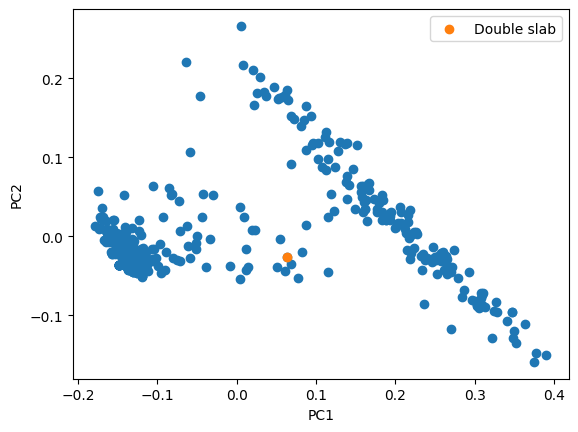

In [23]:
# reduce_dict['kpca'] = {"type": 'SPARSE_KPCA',
#                         'parameter':{"n_components": 6,
#                                      "n_sparse": -1, # no sparsification
#                                 "kernel": {"first_kernel": {"type": 'linear'}}}}
# ref_dm = ref_asapxyz.fetch_computed_descriptors(['avgsoap'])
# ref_dreducer = Dimension_Reducers(reduce_dict)
# ref_proj = ref_dreducer.fit_transform(ref_dm)

plt.scatter(proj[:, 0], proj[:, 1]) 
plt.scatter(proj[-1, 0], proj[-1, 1], label="Double slab")
plt.legend()
plt.xlabel("PC1")
plt.ylabel("PC2")

Text(0, 0.5, 'PC2')

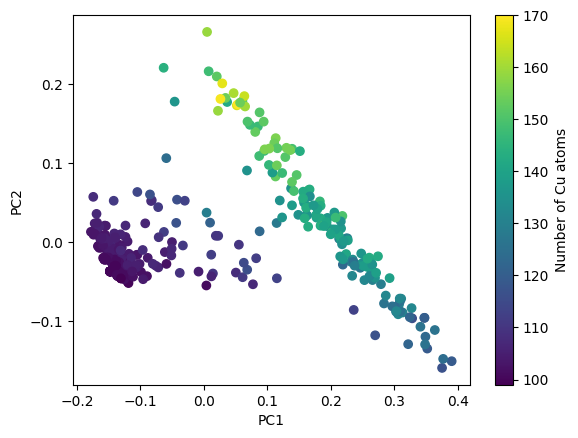

In [24]:
plt.scatter(proj[:, 0], proj[:, 1], c=asapxyz.natom_list, cmap='viridis') 
cbar =plt.colorbar()
cbar.set_label('Number of Cu atoms')
plt.xlabel("PC1")
plt.ylabel("PC2")

In [25]:
from sklearn.neighbors import KernelDensity
kernels_2d = np.vstack([proj[:,0], proj[:,1]]).T
kde = KernelDensity(kernel='gaussian', bandwidth=0.01).fit(kernels_2d)
free_energies = -kde.score_samples(kernels_2d)
print(free_energies)

[-3.12135591 -5.3324848  -2.34807797 -2.4119003  -5.3324848  -3.40403315
 -4.62040134 -2.72663252 -3.06934278 -5.29781003 -3.58792249 -5.3324848
 -3.19001758 -5.3324848  -1.79407165 -1.99499878 -2.54556561 -3.27962379
 -4.25123643 -3.40417381 -3.6299832  -3.45188713 -3.44858645 -2.30069088
 -3.47765899 -2.58434787 -4.95462281 -3.50225749 -1.71036857 -1.44554861
 -2.73352338 -2.53726036 -5.15532571 -4.92011073 -2.81248104 -3.41944787
 -2.56193623 -1.82033844 -4.6056368  -3.28543044 -2.64427674 -3.66237125
 -2.17940989 -1.83151026 -5.3232732  -2.01752388 -4.696914   -5.06767319
 -3.37448505 -2.62961134 -3.26652306 -4.49172462 -2.04502495 -2.52322277
 -4.22946772 -5.37161349 -4.91523447 -5.33265685 -2.6768186  -5.26910061
 -2.52385791 -2.52952322 -1.41132497 -3.50935986 -5.15532571 -2.69257752
 -1.7769824  -1.37933152 -4.15620623 -5.01671456 -5.4031244  -5.3324848
 -2.38191609 -2.22783743 -5.02856207 -4.25017707 -1.37850318 -5.23292998
 -4.23705448 -5.37777492 -3.07336698 -5.44196698 -3.2

(array([], dtype=int64),)


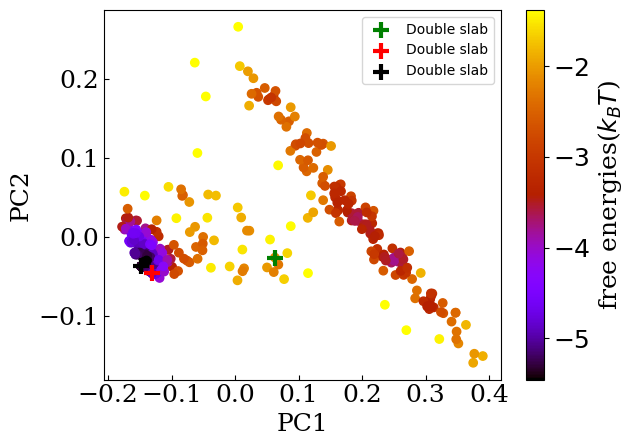

In [26]:
plt.figure()
plt.scatter(kernels_2d[:,0], kernels_2d[:,1], c=free_energies, cmap="gnuplot")
cb = plt.colorbar()
cb.ax.tick_params(labelsize=font["size"])
cb.set_label('free energies($k_BT$)', fontdict = font)

plt.scatter(proj[-1, 0], proj[-1, 1], marker="+", c="green", linewidth=3, s=120, label="Double slab")
plt.scatter(proj[-2, 0], proj[-2, 1], marker="+", c="r", linewidth=3, s=120, label="Double slab")
idx_check = 1
plt.scatter(proj[idx_check, 0], proj[idx_check, 1], marker="+", c="k", linewidth=3, s=120, label="Double slab")
setfigform_simple("PC1", 'PC2')
plt.legend()
print(np.where(proj[:,0]>0.4))

/nfs/scistore14/chenggrp/ptuo/pkgs/deepmd-kit/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


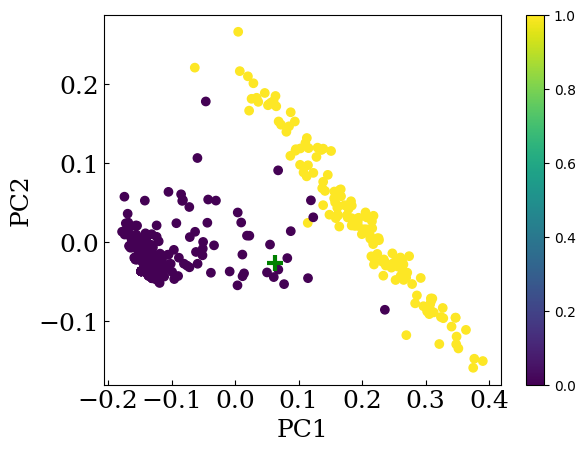

In [27]:

elems = [1,2]
nvars = [500]
L = nvars[0]
channel = len(elems)
atypes = np.load(os.path.join(work_dir, "seq_val_step0.npy")).reshape(-1,nvars[0])
from sklearn.cluster import KMeans
est2 = KMeans(n_clusters=2)
est2.fit(atypes)
labels = est2.labels_
plt.scatter(proj[:-1, 0], proj[:-1, 1], c=labels, cmap='viridis') 
cbar =plt.colorbar()
cb.ax.tick_params(labelsize=font["size"])
plt.scatter(proj[-1, 0], proj[-1, 1], marker="+", c="green", linewidth=3, s=120, label="Double slab")
setfigform_simple("PC1", 'PC2')

Bin Edges: [0.  0.5 1. ]
Bin Counts: [0.625 0.375]


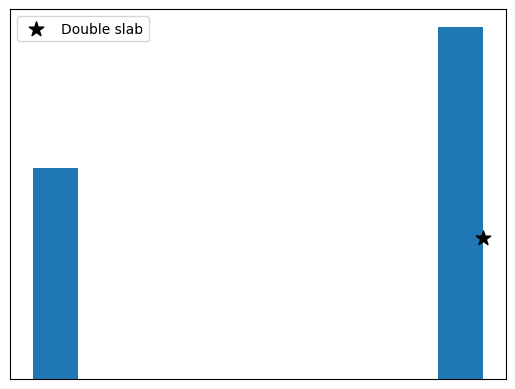

In [28]:
plt.hist(1-labels)
plt.scatter([(1-labels)[-1]], [100], marker="*", c="k", s=120, label="Double slab")
plt.legend()
plt.xticks([])
plt.yticks([])
hist, bin_edges = np.histogram(labels, bins=2) 
print("Bin Edges:", bin_edges)
print("Bin Counts:", hist/sum(hist))